<a href="https://colab.research.google.com/github/baghel24/DeepLearning-pytorch-basics-/blob/main/CAT_vs_DOGS_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, BatchNormalization, Dropout

In [5]:
## wwe are using (generaters) generaters will divide full data in batches.

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
## So because of our before code data is store in
##the form  of numpy array but the problem is the data is
## stotred in array from (0 to 2550. so, we have to normalizize
## the data in the range of (0 to 1)

In [7]:
def normalize(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_data = train_data.map(normalize)
validation_data = validation_data.map(normalize)

Now data is ready so, now we are making a
##CNN model

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding ='valid'))
model.add(BatchNormalization()) ## to reduce overfitting

model.add(Conv2D(64, kernel_size = (3,3), padding='valid', activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding ='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding ='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [10]:
## Now we are compiling the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [11]:
history = model.fit(train_data, epochs=10, validation_data= validation_data)

Epoch 1/10
625/625 [==============================] - 67s 91ms/step - loss: 2.0417 - accuracy: 0.6008 - val_loss: 0.6008 - val_accuracy: 0.6810
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.5376 - accuracy: 0.7328 - val_loss: 0.4795 - val_accuracy: 0.7698
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4579 - accuracy: 0.7855 - val_loss: 0.5445 - val_accuracy: 0.7536
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4006 - accuracy: 0.8217 - val_loss: 0.6809 - val_accuracy: 0.7122
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3569 - accuracy: 0.8500 - val_loss: 0.5678 - val_accuracy: 0.7704
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2616 - accuracy: 0.8893 - val_loss: 0.5468 - val_accuracy: 0.7988
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1885 - accuracy: 0.9236 - val_loss: 0.7047 - val_accuracy:

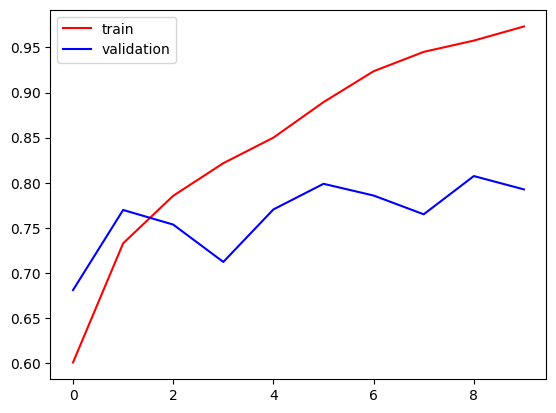

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

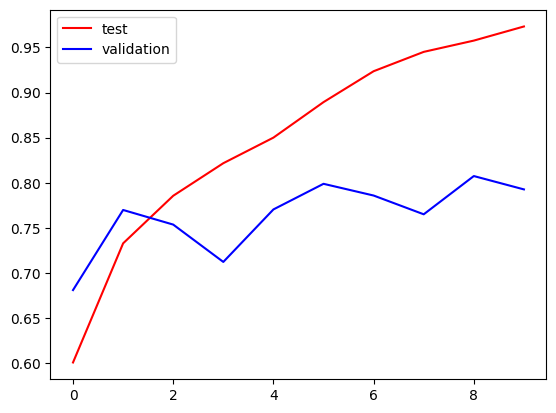

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='test')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

Both the graphs shows the gap between accuracy and validation accuracy is increases which indicates the overfitting is helding in our model.
So, we have to perform some methods to remving the overfitting.
####Methods:
1. Add more data
2. Data Agumentation
3. L1/L2 regulariztion
4. Dropout
5. Batch Norm
6. Reduce complexity

In [14]:
import cv2


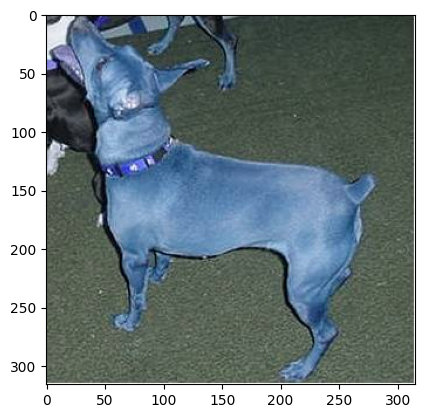

In [26]:
test_img = cv2.imread('/content/test/dogs/dog.10010.jpg')
plt.imshow(test_img)

In [27]:
test_img.shape

(316, 315, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [40]:

prediction = model.predict(test_input)
print("Predicted label:", prediction)

## 0  --->  dogs
## 1  --->  cats


1/1 [==============================] - 0s 18ms/step
Predicted label: [[0.]]
